In [32]:
from sklearn.datasets import load_iris
iris = load_iris()

iris['target']

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Criaremos um modelo preditivo baseado em Clusters

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=4)

print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_predict = knn. predict(x_test)

print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))


0.9666666666666667
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


In [13]:
k_range = range(1,16)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(scores[k]) 
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667}

(0.8, 1.0)

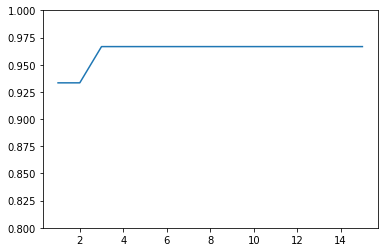

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 
#propriedade pra que a imagem seja plotada no jupyter notebook certinho

plt.plot(k_range, scores_list)
plt.ylim(0.8,1.0)


### Árvore de Decisão


In [28]:
from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)


In [30]:
graph = graphviz.Source(dot_data) 
graph


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH